In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize			# version : 0.17
from sklearn.cluster import AgglomerativeClustering

In [3]:
X = genfromtxt('../../dataset/moon.csv', delimiter=',')
Ӽ = genfromtxt('../../dataset/two_gaussian.csv', delimiter=',')
ɲ = Ӽ.shape[0]
n = X.shape[0]

Kmeans

In [4]:
kmeans = KMeans(n_clusters=2).fit(Ӽ)
Ӽᵏₒ = Ӽ[kmeans.labels_ == 0]
Ӽᵏₗ = Ӽ[kmeans.labels_ == 1]

In [5]:
kmeans = KMeans(n_clusters=2).fit(X)
Xᵏₒ = X[kmeans.labels_ == 0]
Xᵏₗ = X[kmeans.labels_ == 1]

Agglomerative

In [6]:
agglo = AgglomerativeClustering().fit(Ӽ)
Ӽᴬₒ = Ӽ[agglo.labels_ == 0]
Ӽᴬₗ = Ӽ[agglo.labels_ == 1]

In [7]:
agglo = AgglomerativeClustering().fit(X)
Xᴬₒ = X[agglo.labels_ == 0]
Xᴬₗ = X[agglo.labels_ == 1]

Spectral Clustering

In [8]:
γ = 1
K = rbf_kernel(Ӽ, gamma=γ)
[D,V] = eigh(K)
U = V[:, ɲ-2:ɲ]
Ū = normalize(U, norm='l2', axis=1)

In [9]:
kmeans = KMeans(n_clusters=2).fit(Ū)
Ӽₒ = Ӽ[kmeans.labels_ == 0]
Ӽₗ = Ӽ[kmeans.labels_ == 1]

-----------------

In [10]:
γ = 14
K = rbf_kernel(X, gamma=γ)
[D,V] = eigh(K)
U = V[:, n-2:n]
Ū = normalize(U, norm='l2', axis=1)

In [11]:
kmeans = KMeans(n_clusters=2).fit(Ū)
Xₒ = X[kmeans.labels_ == 0]
Xₗ = X[kmeans.labels_ == 1]

In [12]:
plt.figure(figsize = (10, 6))
plt.subplot(231)
plt.scatter(Ӽᵏₒ[:,0], Ӽᵏₒ[:,1], color='red')
plt.scatter(Ӽᵏₗ[:,0], Ӽᵏₗ[:,1], color='blue')
plt.title('Kmeans')

Text(0.5, 1.0, 'Kmeans')

In [13]:
plt.subplot(232)
plt.scatter(Ӽᴬₒ[:,0], Ӽᴬₒ[:,1], color='red')
plt.scatter(Ӽᴬₗ[:,0], Ӽᴬₗ[:,1], color='blue')
plt.title('Agglomerative')

Text(0.5, 1.0, 'Agglomerative')

In [14]:
plt.subplot(233)
plt.scatter(Ӽₒ[:,0], Ӽₒ[:,1], color='red')
plt.scatter(Ӽₗ[:,0], Ӽₗ[:,1], color='blue')
plt.title('Spectral Clustering')

Text(0.5, 1.0, 'Spectral Clustering')

In [15]:
plt.subplot(234)
plt.scatter(Xᵏₒ[:,0], Xᵏₒ[:,1], color='red')
plt.scatter(Xᵏₗ[:,0], Xᵏₗ[:,1], color='blue')
plt.title('Kmeans')

Text(0.5, 1.0, 'Kmeans')

In [16]:
plt.subplot(235)
plt.scatter(Xᴬₒ[:,0], Xᴬₒ[:,1], color='red')
plt.scatter(Xᴬₗ[:,0], Xᴬₗ[:,1], color='blue')
plt.title('Agglomerative')

Text(0.5, 1.0, 'Agglomerative')

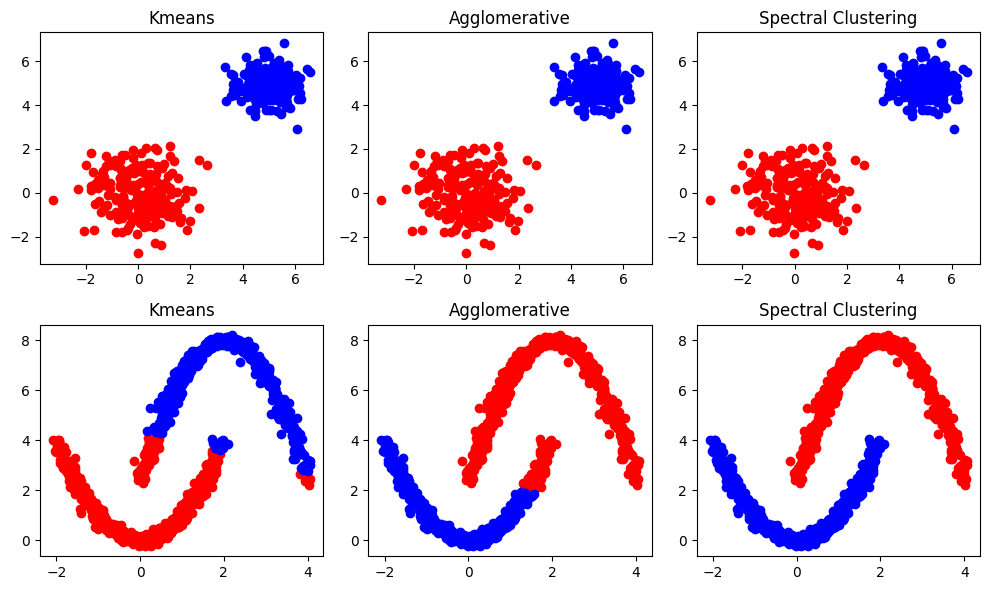

In [17]:
plt.subplot(236)
plt.scatter(Xₒ[:,0], Xₒ[:,1], color='red')
plt.scatter(Xₗ[:,0], Xₗ[:,1], color='blue')
plt.title('Spectral Clustering')
plt.tight_layout()
plt.show()